## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [104]:
# you code here
from sklearn.datasets import load_boston
import numpy as np
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
print (x.shape)
print (y.shape)
dataset.feature_names

(506, 13)
(506,)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

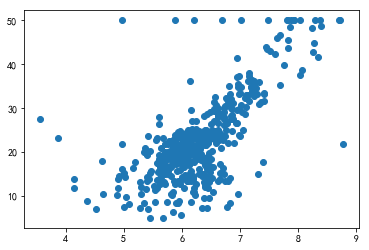

In [105]:
#X的第五列
X_rm = x[:,5]
# plot the RM with respect to y
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_rm,y)

In [106]:
import icecream as ic
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
print (reg.score(x, y))
print ('Linear regression coefficients from sklearn are:' , reg.coef_)
print ('Linear regression intercept from sklearn is:', reg.intercept_ )

0.7406426641094094
Linear regression coefficients from sklearn are: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Linear regression intercept from sklearn is: 36.45948838508994


#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

### KNN classifier and KNN regressor

In [107]:
# you code here
def model(x, y):
    return [(xi, yi) for xi, yi in zip(x, y)]

from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)

print (distance(x[0], x[1]))
print (distance(x[0], x[0]))

from collections import Counter
def predict(testInstance, type='regression', k=5):
    distances = [distance(testInstance, i) for i in x]
    #print (distances)
    kneighbors = np.argsort(distances)[:k]
    ###Returns the indices that would sort an array
    #print (kneighbors)
    count = Counter(y[kneighbors])
    if type=='regression':
        print (y[kneighbors])
        return  print ('predicted value is: ' ,np.mean(y[kneighbors]))
    else:
        print (count)
        return print ('predicted value is: ' , count.most_common()[0][0])
#most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]

0.0057030013836377735
0.0


In [108]:
predict(x[0], type='regression', k=5)

[24.  22.2 20.1 23.9 22.9]
predicted value is:  22.620000000000005


In [109]:
predict(x[0], type='classification', k=5)

Counter({24.0: 1, 22.2: 1, 20.1: 1, 23.9: 1, 22.9: 1})
predicted value is:  24.0


#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [110]:
# you code here
from collections import Counter
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,bought,family_number,gender,income
0,1,1,F,+10
1,1,1,F,-10
2,1,2,F,+10
3,0,1,F,+10
4,0,1,M,+10
5,0,1,M,+10
6,1,2,M,-10


In [129]:
import numpy as np
import pandas as pd
from icecream import ic
def sort_feature_by_importance(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    feature_entropy={}
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            ic(v)
            sub_1 = training_data[training_data[f] == v][target]
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            feature_entropy[f]=entropy_v
    sorted_features = dict(sorted(feature_entropy.items(), key=lambda x: x[1]))
    print('Sort the features by salience:', sorted_features)
    return sorted_features.keys()

In [130]:
sort_feature_by_importance(dataset, 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| v: 'F'
ic| entropy_1: 0.9938582532964797
ic| entropy_2: 0.9068242403669224
ic| entropy_v: 1.9006824936634021
ic| v: 'M'
ic| entropy_1: 0.9068242403669224
ic| entropy_2: 0.9938582532964797
ic| entropy_v: 1.9006824936634021
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| v: '-10'
ic| entropy_1: -0.0
ic| entropy_2: 1.6525187082781072
ic| entropy_v: 1.6525187082781072
ic| v: '+10'
ic| entropy_1: 1.6525187082781072
ic| entropy_2: -0.0
ic| entropy_v: 1.6525187082781072
ic| f: 'family_number'
ic| values: {1, 2}
ic| v: 1
ic| entropy_1: 1.6525187082781072
ic| entropy_2: -0.0
ic| entropy_v: 1.6525187082781072
ic| v: 2
ic| entropy_1: -0.0
ic| entropy_2: 1.6525187082781072
ic| entropy_v: 1.6525187082781072


Sort the features by salience: {'income': 1.6525187082781072, 'family_number': 1.6525187082781072, 'gender': 1.9006824936634021}


dict_keys(['income', 'family_number', 'gender'])

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

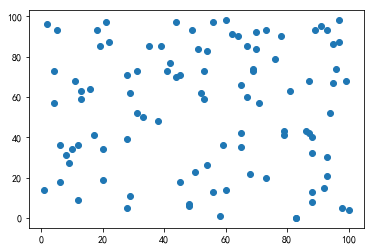

In [88]:
from sklearn.cluster import KMeans
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X, Y)

In [93]:
tranning_data = [[x, y] for x, y in zip(X, Y)]
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[57.2        79.48      ]
 [48.63636364 14.54545455]
 [16.73333333 32.53333333]
 [90.57142857 79.5       ]
 [84.         24.        ]
 [16.9375     76.625     ]]
[5 0 4 3 2 4 0 0 1 2 5 2 1 4 4 3 2 0 3 2 3 1 1 5 4 4 0 2 3 5 0 3 0 3 0 0 0
 4 5 2 1 0 4 0 0 0 0 5 4 0 0 4 1 2 4 5 0 5 0 5 5 3 4 5 0 4 1 0 2 1 4 3 0 1
 1 2 5 3 2 2 4 4 0 4 3 3 2 5 2 5 5 4 2 5 1 3 0 4 0 3]


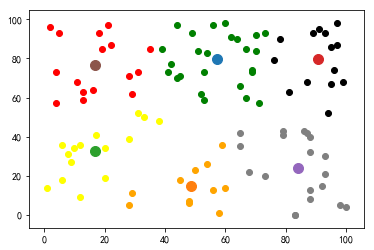

In [94]:
print (cluster.cluster_centers_)
print (cluster.labels_)
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']
for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: a model is trying to simplify a problem and get answer by observe historical data.<br>
All models are wrong, because we are trying to simpliy the problem so we might miss some potential factors. But we say the model is useful since some good models include top factors in the mode, so the prediction will be close to ground truth.  

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: <br>
Underfitting is accuracy of the model is low in both training and test dataset. 
The model is too simple that did not capture the full relationship between X and Y. Additional Xs or transformation of Xs need to be added to the model, or using a more complicated algorithm for fitting.


Overfitting is the model's accuracy is high for the training dataset but low for the test dataset.
The cause for overfitting could be:  <br>
1) the model is too smiple, not complicated enought to capture the full relationship <br>
2) The training dataset is too small <br>
3) The training dataset is only in certain range, while the test or the dataset needs to be predicted are in a different rage <br>
4) The parameters for the model is too big <br>

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: <br>
**Precision** = True Positive / (True Positive + False Positive) = True Positive /  All positive predicted <br>

**Recall** = True Positive / (True Positive + False negative) = True positive / All positive in ground truth  <br>

**F1 score** =  2* (Precision * recall) / (Precision +recall ) 

**AUC:** ROC curve is a probability curve that measure the performance of classification problem. AUC means area under the ROC curve, which measures the degree of separability. The x-axis of ROC curve is False positive rate (1 - Specificity ). The y-axis of ROC curve is True positive rate ( also called sensitivity) 

**Sensitivity **(also called true positive rate) = True postive / ( True positive + False negative) <br>

**Specificity **(also called true negative rate) = True Negative / ( True Negative + False Positive) <br>

**F2 score:**<br>
The general formula for the F-score is the following:

𝐹 score =(1+β2)⋅𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛⋅𝑟𝑒𝑐𝑎𝑙𝑙 /((β2⋅𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)+𝑟𝑒𝑐𝑎𝑙𝑙)
where β is a positive real. For the F2 score, you just set β equal to 2. The intuition behind the F2 score is that it weights recall higher than precision. This makes the F2 score more suitable in certain applications where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications.<br>

Reference:
https://en.wikipedia.org/wiki/Sensitivity_and_specificity <br>
https://en.wikipedia.org/wiki/Receiver_operating_characteristic <br>
https://www.quora.com/What-is-the-F2-score-in-machine-learning <br>


<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: Machine learning uses historical data try to find the relationship between independent variables and dependent variables or patterns in independent variablse themselves, it relies on statistical probability. <br>

While classicial programming are more rule based. 

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

I think the evaluatoin here means cost function. We need to define cost function as the first step of machine learning and either maxmize or minimize the function. When it applies to business, we also need to consider the cost of each wrong case (e.g. the cost of false positive and false negative might be quite different in different use case) while evaluating a model. 

So I agree that it solves half of the problem, the rest of problems remain on select a good model and hyperparamters.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [131]:
sorted_features=sort_feature_by_importance(dataset, 'bought')
sorted_features

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| v: 'F'
ic| entropy_1: 0.9938582532964797
ic| entropy_2: 0.9068242403669224
ic| entropy_v: 1.9006824936634021
ic| v: 'M'
ic| entropy_1: 0.9068242403669224
ic| entropy_2: 0.9938582532964797
ic| entropy_v: 1.9006824936634021
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| v: '-10'
ic| entropy_1: -0.0
ic| entropy_2: 1.6525187082781072
ic| entropy_v: 1.6525187082781072
ic| v: '+10'
ic| entropy_1: 1.6525187082781072
ic| entropy_2: -0.0
ic| entropy_v: 1.6525187082781072
ic| f: 'family_number'
ic| values: {1, 2}
ic| v: 1
ic| entropy_1: 1.6525187082781072
ic| entropy_2: -0.0
ic| entropy_v: 1.6525187082781072
ic| v: 2
ic| entropy_1: -0.0
ic| entropy_2: 1.6525187082781072
ic| entropy_v: 1.6525187082781072


Sort the features by salience: {'income': 1.6525187082781072, 'family_number': 1.6525187082781072, 'gender': 1.9006824936634021}


dict_keys(['income', 'family_number', 'gender'])

In [133]:
test_case={'income': -10, 'family_number': 1, 'gender': 'M'}

In [144]:
Counter(dataset['bought']).most_common()[0][0]

1

In [145]:
sorted_features

dict_keys(['income', 'family_number', 'gender'])

### 这一题不会做，没写出来，空着

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predict函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

In [51]:
# you code here
#loss function based mean absolute difference
def loss2(y,y_hat):
    return sum(np.absolute(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

$$ \frac{\partial{loss}}{\partial{k}} =  -\frac{1}{n}\sum \frac{y_i-\hat{y_i}}{|y_i-\hat{y_i}|}\ x_i$$ 

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum \frac{y_i-\hat{y_i}}{|y_i-\hat{y_i}|}\ $$ 

In [57]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)/ np.absolute(y_i - y_hat_i) * x_i
    return -1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)/np.absolute(y_i-y_hat_i)
    return -1 / n * gradient

#### update the paramters with -gradient * learning rate

In [68]:
#initialized parameters
def price(rm, k, b):
    return k * rm + b

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 100 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss2(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    #update the paramters with -gradient * learning rate
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 489.47887247411074, parameters k is -83.84213831438174 and b is 59.97111940966735
Iteration 1, the loss is 449.2587966326328, parameters k is -77.59816043469719 and b is 60.95007715461557
Iteration 2, the loss is 412.3349436236702, parameters k is -71.86587225446502 and b is 61.84859474788084
Iteration 3, the loss is 378.43717281691517, parameters k is -66.60333844882788 and b is 62.67326463512818
Iteration 4, the loss is 347.3174828498916, parameters k is -61.77206048578569 and b is 63.43013898076201
Iteration 5, the loss is 318.7481972130746, parameters k is -57.33669496520482 and b is 64.12477394646179
Iteration 6, the loss is 292.52029853465643, parameters k is -53.26479504124194 and b is 64.76227034088794
Iteration 7, the loss is 268.4418993783392, parameters k is -49.526573036389976 and b is 65.34731093795725
Iteration 8, the loss is 246.33683836629163, parameters k is -46.0946825103956 and b is 65.88419473671392
Iteration 9, the loss is 226.0433913562842

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

### 比较用MSE作为loss funciton看结果是否有很大不同：
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

In [70]:
# loss function based on MSE
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [71]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [72]:
#initialized parameters

#k = random.random() * 200 - 100  # -100 100
#b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 100 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 182.3151604708673, parameters k is -7.5783889011578625 and b is 71.43597614266378
Iteration 1, the loss is 182.30848914783968, parameters k is -7.577987548029883 and b is 71.43342461000455
Iteration 2, the loss is 182.3018181456699, parameters k is -7.5775862236831495 and b is 71.43087313569531
Iteration 3, the loss is 182.29514746434162, parameters k is -7.577184926549193 and b is 71.4283217199811
Iteration 4, the loss is 182.28847710383852, parameters k is -7.57678365518807 and b is 71.42577036308678
Iteration 5, the loss is 182.28180706414378, parameters k is -7.5763824082778255 and b is 71.42321906521867
Iteration 6, the loss is 182.2751373452416, parameters k is -7.575981184604829 and b is 71.42066782656603
Iteration 7, the loss is 182.26846794711514, parameters k is -7.575579983054891 and b is 71.41811664730251
Iteration 8, the loss is 182.26179886974901, parameters k is -7.575178802605118 and b is 71.4155655275874
Iteration 9, the loss is 182.25513011312

Loss function ： Mean absolute difference： <br>
Iteration 99, the loss is 10.248891679889041, parameters k is -7.634996518540308 and b is 71.69147864050056

Loss function : MSE <br>
Iteration 99, the loss is 181.65625352078237, parameters k is -7.538721963910451 and b is 71.183668640503   